In [133]:
import requests
import json
import datetime
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

In [123]:
today = date.today()
someday = date(2020, 9, 1)
diff = -(someday - today)

In [124]:
url = f"https://api.alternative.me/fng/?limit={diff.days + 1}"
r = requests.request("GET", url)

sent_index = json.loads(r.content)

In [125]:
for data in sent_index["data"]:
    data["timestamp"] = datetime.datetime.fromtimestamp(int(data["timestamp"])).strftime('%Y-%m-%d')

In [151]:
df = pd.DataFrame(sent_index["data"])
del df['time_until_update']
df.set_index('timestamp')
df["value"] = df["value"].astype(int)

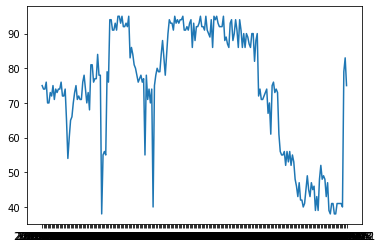

In [153]:
plt.plot(df['timestamp'], df['value'])